# Product Detection in Grocerry Shops Shelves

### Problem Statement - Given a grocery shop image we have to detect which part of image contains the product and how many product contains in the image , we show the product by using the bounding boxes

### Dataset overview:
### Data Form : JPG Image Files
#### Using the data from :https://github.com/gulvarol/grocerydataset#shelfimages
#### features - Images of shelves from grocerry stores
#### ground truth : annotations of image
### image properties:
The naming is as follows:

			"C<c>_P<p>_N<n>_S<s>_<i>.JPG"
			where
				<c> := camera id (1: iPhone5S, 2: iPhone4, 3: Sony Cybershot, 4: Nikon Coolpix)
				<p> := planogram id
				<n> := the rank of the top shelf on the image according to the planogram
				<s> := number of shelves on the image
				<i> := copy number

# Exploratory Data Analysis

In [1]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim
!pip install pycocotools
!pip install tensorflow-object-detection-api

     |████████████████████████████████| 352 kB 12.8 MB/s 
     |████████████████████████████████| 577 kB 11.4 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 54 kB 2.7 MB/s 
     |████████████████████████████████| 3.2 MB 47.3 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=2b8c3845e1aedd2c61bc8923bc06cd5aa68f92d94be4ccc0a6f1dc670ecc57b7
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


In [2]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2851, done.
remote: Counting objects: 100% (2851/2851), done.
remote: Compressing objects: 100% (2385/2385), done.
remote: Total 2851 (delta 731), reused 1294 (delta 429), pack-reused 0
Receiving objects: 100% (2851/2851), 32.85 MiB | 18.18 MiB/s, done.
Resolving deltas: 100% (731/731), done.


In [8]:
!pwd

/content


In [9]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [12]:
%%bash 
cd models/research
cp object_detection/packages/tf2/setup.py .
pip install . --upgrade

Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1660787 sha256=b6a52e1e8eb935a7cffbcfb1201c10ac285c803e7f2ad5fe8cc98364641c1020
  Stored in directory: /tmp/pip-ephem-wheel-cache-5zbyj1ww/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=f644f3ecb87a02be7c6bd823fe6a69d7daed09a0fab4baea5b64ccc26a37a8d4
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for avro-python3: filename=avro_python3-1.9.2.1-py3-none-any.whl size=43512 sha256=7d130cbb17d6cbb60b2dc47008737272e0532fbd757bec63d248e69723dc274c
  Stored in directory: /root/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78546 sha256=02a5c4c12e35dcb8e2d3b0b59e2afdff95e2d572257efc416

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.12.2 requires dill>=0.3.4, but you have dill 0.3.1.1 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# references : https://www.kaggle.com/jpmiller/basic-eda-with-images
import numpy as np
import pandas as pd
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
%cd /content/drive/MyDrive/GroceryShelf/Product-Detection-From-Grocery-Shelf/

/content/drive/MyDrive/GroceryShelf/Product-Detection-From-Grocery-Shelf


In [24]:
# number of data points in the data
pathTrain = "../Dataset/GroceryDataset_part1/ShelfImages/train/"
pathTest = "../Dataset/GroceryDataset_part1/ShelfImages/test/"
train = os.listdir(pathTrain)
test = os.listdir(pathTest)

print("train_row_count : " , len(train))
print("test_row_count : " , len(test))
print("Number of total Data Points:" , len(train)+len(test))

train_row_count :  283
test_row_count :  71
Number of total Data Points: 354


### Printing Random Image from Training and Testing data

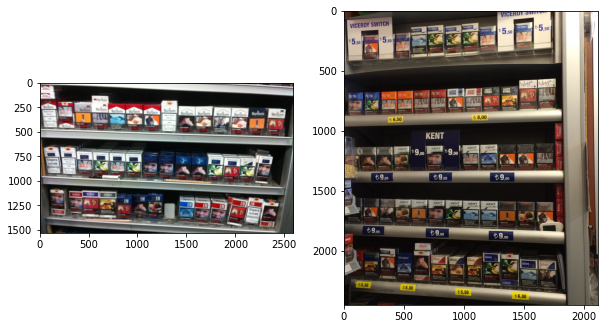

In [25]:
# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows =1
columns = 2

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# Train Image
image_name1=random.choice(train)
img1=mpimg.imread(pathTrain + image_name1)
imgplot1 = plt.imshow(img1)

# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)

# Test Image
image_name2=random.choice(test)
img2=mpimg.imread(pathTest + image_name2)
imgplot2 = plt.imshow(img2)

## Drawing Bounding Box at random training image

Number of Products: 41


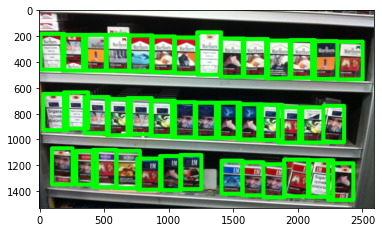

In [26]:
f = open("../Dataset/GroceryDataset_part1/annotation.txt", "r")
annot = []
for i in f:
    if i.split()[0] == image_name1:
            annot = i.split()[2:]
            break

color = (0, 255,0 ) 
thickness = 30
print("Number of Products:" , len(annot)//5)

for i in range(0,len(annot) , 5):
    x = int(annot[i])
    y = int(annot[i+1])
    w = int(annot[i+2])
    h = int(annot[i+3])
    b = annot[i+4]
    img = cv2.rectangle(img1 ,(x,y) , (x+w , y+h) ,color , thickness)
imgplot = plt.imshow(img)

## Average Number of Shelve in Images

In [27]:
shelve_counts = []
for i in train:
    count = int(i.split('_')[-2][1:])
    shelve_counts.append(count)
    
print("Average Number of Shelves in Image" , sum(shelve_counts)/len(shelve_counts))

Average Number of Shelves in Image 3.243816254416961


## Histogram of Number of Shelve

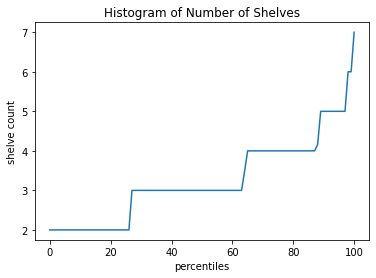

In [28]:
percentiles = [np.percentile(shelve_counts,i) for i in range(0,101 , 1)]
plt.plot(range(0,101,1) , percentiles)
plt.title("Histogram of Number of Shelves")
plt.xlabel("percentiles")
plt.ylabel("shelve count")
plt.show()

## Average Number of Products in Image

In [29]:
products_count = []

for i in f:
    number = int(i.split()[1])
    products_count.append(number)

f.close()
print("Average Number of Products in Image" , sum(products_count)/len(products_count))

Average Number of Products in Image 38.05759162303665


## Histogram of Number of Products

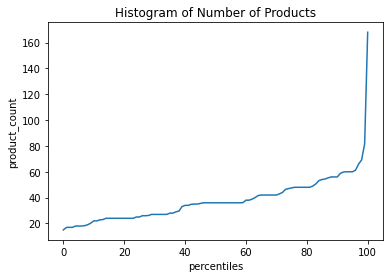

In [30]:
percentiles = [np.percentile(products_count,i) for i in range(0,101 , 1)]
plt.plot(range(0,101,1) , percentiles)
plt.title("Histogram of Number of Products")
plt.xlabel("percentiles")
plt.ylabel("product_count")
plt.show()

## Number of images Captured using each Camera

In [31]:
cameras_dict = {1:0 , 2:0 , 3:0 , 4:0}
for i in train:
    id = int( i.split('_')[ 0 ][ 1: ] )
    cameras_dict[id] += 1

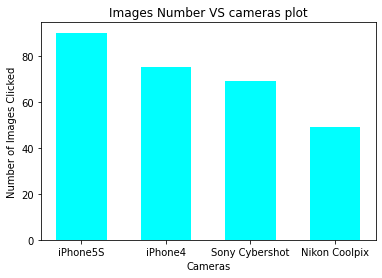

In [32]:
plt.title("Images Number VS cameras plot")
plt.ylabel("Number of Images Clicked")
plt.xlabel("Cameras")
plt.bar(['iPhone5S', 'iPhone4','Sony Cybershot','Nikon Coolpix']  ,cameras_dict.values(), color ='cyan',  
        width = 0.6)
plt.show()

## Observations:
* Average Number of Shelve is around 3
* less than 90% of the images have less than or equal to 4 shelves
* Average Number of Products in Image 38.05759162303665
* less than 99% of images have less than 80 products in images
* iphone 5s has the largest number of image captures than any device

# Creating Input PipeLine

In [33]:
!pip install pillow
!pip install lxml
!pip install Cython
!pip install jupyter
!pip install matplotlib
!pip install pandas
!pip install opencv-python
!pip install tensorflow

In [34]:
!pwd
if not os.path.exists('models'):
    !git clone https://github.com/tensorflow/models/
%cd ./models/research/object_detection

/content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf
/content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf/models/research/object_detection


In [35]:
if not os.listdir('training'): 
  !mkdir training
  !mkdir inference_graph
  !mkdir -p images/train
  !mkdir -p images/test

%cd ../../../

/content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf


## Moving All image Files to train and Test Folder
* Move the Train Images to images/train
* Move the test Images to images/test

In [36]:
trainset = train.copy()
testset = test.copy()
for fileName in trainset + testset:
    if fileName in trainset:
        shutil.copyfile(pathTrain+fileName ,"./models/research/object_detection/images/train/" + fileName)
    else:
        shutil.copyfile(pathTest+fileName ,"./models/research/object_detection/images/test/" + fileName)

## Creating the train_labels and test_labels
* First We will create a dictionary where keys will be image and values will be annotations
* Create train_labels.csv and test_labels.csv containing the Below columns:
<br>
filename' , 'width' , 'class'  , 'height' , 'xmin' , 'xmax' , 'ymin'  , 'ymax'

In [37]:
f = open("../Dataset/GroceryDataset_part1/annotation.txt", "r")
annotations_dict = {}
for i in f:
    file_name = i.split()[0]
    rest = i.split()[2:]
    annotations_dict[file_name] = rest

In [38]:
import pandas as pd
## for Training Set
di_train = {'filename':[] , 'width':[] , 'class':[]  , 'height':[] , 'xmin':[] , 'xmax':[] , 'ymin':[]  , 'ymax':[] }
for fname in trainset:
    for i in range(0, len(annotations_dict[fname]) , 5):
        x = annotations_dict[fname][i] ; y = annotations_dict[fname][i + 1] 
        
        w = annotations_dict[fname][i + 2] ; h = annotations_dict[fname][i + 3]
        
        x = int(x); y = int(y) ; w = int(w) ; h = int(h)
        
        di_train['filename'].append(fname)
        di_train['width'].append(w)
        di_train['class'].append("Product")
        di_train['height'].append(h)
        di_train['xmin'].append(x)
        
        di_train['xmax'].append(x+w)
        di_train['ymin'].append(y)
        di_train['ymax'].append(y+h)
        
df_train = pd.DataFrame(di_train)
df_train.to_csv("./models/research/object_detection/images/train_labels.csv")

di_test = {'filename':[] , 'width':[] , 'class':[]  , 'height':[] , 'xmin':[] , 'xmax':[] , 'ymin':[]  , 'ymax':[] }

for fname in testset:
    for i in range(0, len(annotations_dict[fname]) , 5):
        x = annotations_dict[fname][i] ; y = annotations_dict[fname][i + 1] 
        w = annotations_dict[fname][i + 2] ; h = annotations_dict[fname][i + 3]
        x = int(x); y = int(y) ; w = int(w) ; h = int(h)
        
        di_test['filename'].append(fname)
        di_test['width'].append(w)
        di_test['class'].append("Product")
        di_test['height'].append(h)
        di_test['xmin'].append(x)
        di_test['xmax'].append(x+w)
        di_test['ymin'].append(y)
        di_test['ymax'].append(y+h)

df_test = pd.DataFrame(di_test)

df_test.to_csv("models/research/object_detection/images/test_labels.csv")

In [39]:
!pwd

/content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf


## Creating the tf records file from images and annotations
* We will be creating train.record and test.record

In [40]:
from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow.compat.v1 as tf
from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

def class_text_to_int(row_label):
    if row_label == 'Product':
        return 1
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))
        
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    
    return tf_example


def main():
    for item in ['test', 'train']:
        output_path = "./models/research/object_detection/images/{}.record".format(item)
        writer = tf.io.TFRecordWriter(output_path)
        path = os.path.join("./models/research/object_detection/", "images/{}".format(item))
        examples = pd.read_csv("./models/research/object_detection/images/{}_labels.csv".format(item))
        grouped = split(examples, 'filename')
        for group in grouped:
            tf_example = create_tf_example(group, path)
            writer.write(tf_example.SerializeToString())

        writer.close()
        output_path = os.path.join(os.getcwd(), output_path)
        print('Successfully created the TFRecords: {}'.format(output_path))

main()

Successfully created the TFRecords: /content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf/./models/research/object_detection/images/test.record
Successfully created the TFRecords: /content/drive/My Drive/GroceryShelf/Product-Detection-From-Grocery-Shelf/./models/research/object_detection/images/train.record


## Creating the  labelmap

In [41]:
%%writefile ./models/research/object_detection/training/labelmap.pbtxt
item {
  id: 1
  name: 'Product'
}

Writing ./models/research/object_detection/training/labelmap.pbtxt
